In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
news_data = pd.read_excel('news_data.xlsx', skiprows = [0,1,2,4], header = [0,1],index_col = 0, parse_dates= True)

In [3]:
all_prices = pd.read_excel('price.xlsx', index_col=0, header = 0, parse_dates=True)

In [7]:
NEWS_PUBLICATION_COUNT = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")]
NEWS_PUBLICATION_COUNT.columns = news_data.columns.get_level_values(0)[0:505]

NEWS_NEG_SENTIMENT_COUNT = news_data.loc[:,(slice(None),"NEWS_NEG_SENTIMENT_COUNT")]
NEWS_NEG_SENTIMENT_COUNT.columns = news_data.columns.get_level_values(0)[0:505]

NEWS_POS_SENTIMENT_COUNT = news_data.loc[:,(slice(None),"NEWS_POS_SENTIMENT_COUNT")]
NEWS_POS_SENTIMENT_COUNT.columns = news_data.columns.get_level_values(0)[0:505]

m = NEWS_POS_SENTIMENT_COUNT
n = NEWS_NEG_SENTIMENT_COUNT
mean = (m-n)/(m+n)
dispersion = (m*np.power(1-mean,2)+n*np.power(-1-mean,2))/(m+n)

In [212]:
log_return = np.log(all_prices/all_prices.shift(1))
_return = (all_prices-all_prices.shift(1))/all_prices.shift(1)
return_return = (_return-_return.shift(1))/_return.shift(1)
log_return_lag_1 = log_return.shift(1)
log_return_lag_2 = log_return.shift(2)
log_return_lag_3 = log_return.shift(3)
log_return_lag_4 = log_return.shift(3)
log_return_lag_5 = log_return.shift(3)



In [99]:
def regre_1():
    list_ = []
    
    regression_data_2 = pd.DataFrame()
    regression_data_2['log_return'] = np.array(log_return.melt().value)

    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
    regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)

    regression_data_2['NEWS_PUBLICATION_COUNT'] = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")].apply(zscore).shift(-1).melt().value
    regression_data_2['NEWS_HEAT_READ_DAVG'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DAVG")].apply(zscore).shift(-1).melt().value
    regression_data_2['NEWS_HEAT_READ_DMAX'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DMAX")].apply(zscore).shift(-1).melt().value

    regression_data_2['NEWS_NEG_SENTIMENT_COUNT'] = NEWS_NEG_SENTIMENT_COUNT.apply(zscore).shift(-1).melt().value
    regression_data_2['NEWS_POS_SENTIMENT_COUNT'] = NEWS_POS_SENTIMENT_COUNT.apply(zscore).shift(-1).melt().value

    regression_data_2['NEWS_DISPERSION'] = dispersion.melt().shift(-1).value
    regression_data_2 = regression_data_2.dropna()

    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]


    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

    print(est2.rsquared)

# table 1 in page 1

In [15]:
regre_1()

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     181.2
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:41:59   Log-Likelihood:             2.9205e+05
No. Observations:              112118   AIC:                        -5.841e+05
Df Residuals:                  112108   BIC:                        -5.840e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [16]:
R_sq_all = 0.014334896815390685

In [42]:
def regre_2():
    regression_data_2 = pd.DataFrame()
    regression_data_2['log_return'] = np.array(log_return.melt().value)

    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
    regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)

    regression_data_2['NEWS_PUBLICATION_COUNT'] = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")].apply(zscore).shift(-1).melt().value
    regression_data_2['NEWS_HEAT_READ_DAVG'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DAVG")].apply(zscore).shift(-1).melt().value
    regression_data_2['NEWS_HEAT_READ_DMAX'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DMAX")].apply(zscore).shift(-1).melt().value

    regression_data_2['NEWS_NEG_SENTIMENT_COUNT'] = NEWS_NEG_SENTIMENT_COUNT.apply(zscore).shift(-1).melt().value
    regression_data_2['NEWS_POS_SENTIMENT_COUNT'] = NEWS_POS_SENTIMENT_COUNT.apply(zscore).shift(-1).melt().value

    regression_data_2['NEWS_DISPERSION'] = dispersion.melt().shift(-1).value
    regression_data_2 = regression_data_2.dropna()
    
    for i in range(0,6):
        regression_data_3 = regression_data_2.drop(regression_data_2.columns[i+4], axis=1)
        X = regression_data_3.iloc[:,1:]
        y = regression_data_3.iloc[:,0]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
#         print(est2.summary())
        print("delta_r_squared: ", regression_data_2.columns[i+4] ,R_sq_all-est2.rsquared)

# table 2 in page 1
Sort by delta R^2 and tell that NEWS_NEG_SENTIMENT_COUNT seems to be the most important factor

In [43]:
regre_2()

delta_r_squared:  NEWS_PUBLICATION_COUNT 0.00016978412259627262
delta_r_squared:  NEWS_HEAT_READ_DAVG 0.00034481988592049984
delta_r_squared:  NEWS_HEAT_READ_DMAX 0.00011991283151546739
delta_r_squared:  NEWS_NEG_SENTIMENT_COUNT 0.008878690386827093
delta_r_squared:  NEWS_POS_SENTIMENT_COUNT 0.0005789754354941223
delta_r_squared:  NEWS_DISPERSION 0.0022460509006357876


In [44]:
def over_reaction_factor(lag):
    over_reaction_factor = log_return
    
    for i in range(1,lag+1):
        over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)
    
    NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT.fillna(0).apply(zscore)
    NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
    NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
    NEG_0_1_signal = NEG_0_1_signal.shift(lag-1)
    
    NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 1    
    
    return NEG_0_1_signal

In [45]:
bad_news_agent = over_reaction_factor(1)

# figure 1 in page 2

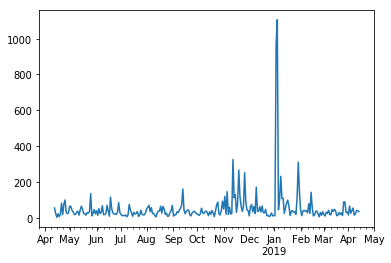

In [48]:
NEWS_NEG_SENTIMENT_COUNT.AAPL.plot()

# figure 2 in page 2

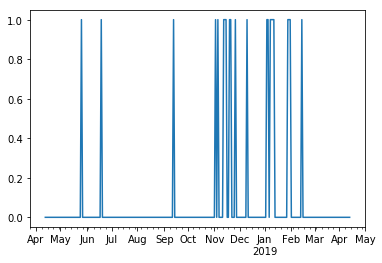

In [47]:
bad_news_agent.AAPL.plot()

# figure 3 in page 2

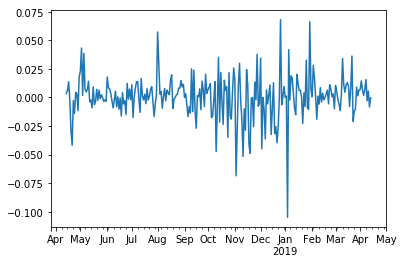

In [62]:
log_return.AAPL.plot()

# figure 4 in page 2

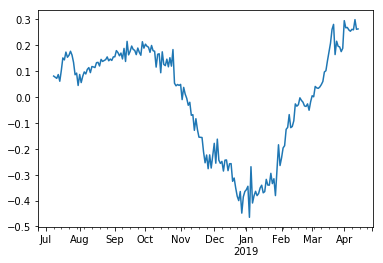

In [61]:
good_stock_agent = log_return
for i in range(1,60+1):
    good_stock_agent = good_stock_agent+log_return.shift(1+i)

good_stock_agent.AAPL.plot()

In [ ]:
# lag = 1, 
# period = 5, 
# th = 0.1, 
def over_reaction_factor_look_back(lag, period, th):
    
    over_reaction_factor = log_return
    
    for i in range(1,lag+1):
        over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)
    
    NEWS_NEG_SENTIMENT_COUNT_POST_MKT = NEWS_NEG_SENTIMENT_COUNT.shift(-1)
    
    NEG_0_1_signal = pd.DataFrame(columns = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.columns)
    for date in NEWS_NEG_SENTIMENT_COUNT_POST_MKT.index:
        NEG_0_1_signal.loc[date,:] = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.loc[:date,:].apply(zscore).iloc[-1,:]
    
    NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.fillna(NEWS_NEG_SENTIMENT_COUNT_POST_MKT.mean()).apply(zscore)
    
    NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
    NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
    
    NEG_0_1_signal = NEG_0_1_signal.shift(lag)
    
    NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 0.1    
    
    for i in range(1,period+1):
        NEG_0_1_signal = NEG_0_1_signal + log_return.shift(lag+i)
    return NEG_0_1_signal

In [163]:
# lag = 1, 
# period = 5, 
# th = 0.1, 
def over_reaction_factor_look_ahead(lag, period, th):
    
    over_reaction_factor = log_return
    
    for i in range(1,lag+1):
        over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)
    
    NEWS_NEG_SENTIMENT_COUNT_POST_MKT = NEWS_NEG_SENTIMENT_COUNT.shift(-1)
    
    NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.fillna(NEWS_NEG_SENTIMENT_COUNT_POST_MKT.mean()).apply(zscore)
    
    NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
    NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
    
    NEG_0_1_signal = NEG_0_1_signal.shift(lag)

    NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 0.1    
    
#     look_ahead_factor = log_return.shift(lag)

    for i in range(1,period+1):
        NEG_0_1_signal = NEG_0_1_signal + log_return.shift(lag+i)
        
#         look_ahead_factor = look_ahead_factor+look_ahead_factor.shift(i)
    
#     NEG_0_1_signal[(NEG_0_1_signal==1) & (look_ahead_factor>th)] = 1
    
    return NEG_0_1_signal

# figure 5 in page 2

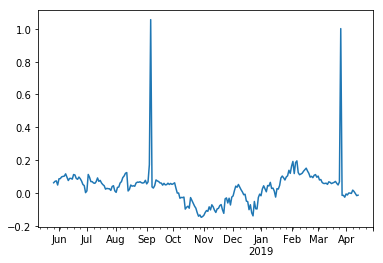

In [156]:
over_reaction_factor_look_ahead(1,30,0.1).NKE.plot()

# Page 3:

In [157]:
def regre_bmk_ar3():
    regression_data_2 = pd.DataFrame()

    regression_data_2['log_return'] = np.array(log_return.melt().value)

    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
    regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
    regression_data_2 = regression_data_2.dropna()

    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    return est2.rsquared.round(3)

In [158]:
bmk_r_sqd = regre_bmk_ar3()
bmk_r_sqd

0.001

In [315]:
def regre_test_over_reaction_look_ahead(lag,period,th):
    
    regression_data_2 = pd.DataFrame()
    regression_data_2['log_return'] = np.array(log_return.melt().value)
#     regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
#     regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
#     regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
    regression_data_2['S&P 500'] = np.array(copy.melt().value)

    regression_data_2['over_reaction_factor'] = over_reaction_factor_look_ahead(lag,period,th).shift(-9).melt().value
    
    regression_data_2 = regression_data_2.dropna()
    
    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    print(est2.summary())
    print("t = ", est2.tvalues[4].round(2))
    print("delta rsquared = ", est2.rsquared.round(3)-bmk_r_sqd)

In [316]:
regre_test_over_reaction_look_ahead(1,5,0.1)

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     167.7
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.87e-73
Time:                        09:00:29   Log-Likelihood:             2.9450e+05
No. Observations:              114035   AIC:                        -5.890e+05
Df Residuals:                  114032   BIC:                        -5.890e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0254 

IndexError: index out of bounds

In [166]:
company_info = pd.read_excel('Copy of symbols of sp500 2.xlsx', header = 0, index_col = 0)

In [204]:
company_list_by_cap = company_info.sort_values(['marketcap']).dropna().index

In [205]:
company_list_by_cap

Index(['NI', 'MAT', 'GS', 'BF/B', 'HRB', 'FLIR', 'PXD', 'LEG', 'MAC', 'AMG',
       ...
       'XOM', 'JPM', 'VAR', 'JNJ', 'FAST', 'GM', 'GOOG', 'AMZN', 'MSFT',
       'AAPL'],
      dtype='object', name='stock', length=503)

In [186]:
high_cap_list = company_info.index[company_info.marketcap > 100000]
low_cap_list = company_info.index[company_info.marketcap <= 100000]

In [187]:
def regre_high_low_cap(cap_list,lag,period,th):
    
    regression_data_2 = pd.DataFrame()
    
    regression_data_2['log_return'] = np.array(log_return.loc[:,cap_list].melt().value)
    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.loc[:,cap_list].melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.loc[:,cap_list].melt().value)
    regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.loc[:,cap_list].melt().value)
    
    regression_data_2['over_reaction_factor'] = over_reaction_factor_look_ahead(lag,period,th).shift(-1).loc[:,cap_list].melt().value
    
    regression_data_2 = regression_data_2.dropna()
    
    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    print(est2.summary())
#     print("t = ", est2.tvalues[4].round(2))
#     print("delta rsquared = ", est2.rsquared.round(3)-bmk_r_sqd)

In [208]:
for i in [0,50,100,150,200,250,300,350,400]:
    regre_high_low_cap(company_list_by_cap[i:i+50],1,5,0.1)

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     45.43
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           6.27e-38
Time:                        00:02:28   Log-Likelihood:                 29015.
No. Observations:               11730   AIC:                        -5.802e+04
Df Residuals:                   11725   BIC:                        -5.798e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0010 

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     48.98
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           6.07e-41
Time:                        00:02:29   Log-Likelihood:                 32877.
No. Observations:               12240   AIC:                        -6.574e+04
Df Residuals:                   12235   BIC:                        -6.571e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0003 

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     65.53
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           6.21e-55
Time:                        00:02:31   Log-Likelihood:                 32520.
No. Observations:               12240   AIC:                        -6.503e+04
Df Residuals:                   12235   BIC:                        -6.499e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0006 

In [226]:
import pandas_datareader.data as web
from datetime import datetime

spx = web.DataReader('SPY', 'iex', datetime(2018,4,12), datetime(2019,4,12)).close
# spx = spx/spx[0]
spx.index = pd.to_datetime(spx.index)

In [235]:
copy = all_prices.copy()

In [236]:
for i in copy.columns:
    copy[i] = spx

In [242]:
def regre_bmk_ar2():
    regression_data_2 = pd.DataFrame()

    regression_data_2['log_return'] = np.array(log_return.melt().value)

    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
    regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
#     regression_data_2['log_return_lag_4'] = np.array(log_return_lag_4.melt().value)
#     regression_data_2['log_return_lag_5'] = np.array(log_return_lag_5.melt().value)
    
    regression_data_2['S&P 500'] = np.array(copy.melt().value)
    
    regression_data_2['over_reaction_factor'] = over_reaction_factor_look_ahead(1,5,0.1).shift(-1).melt().value

    regression_data_2 = regression_data_2.dropna()

    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    return est2.summary()

regre_bmk_ar2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_return   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     439.8
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:12:11   Log-Likelihood:             2.9983e+05
No. Observations:              115458   AIC:                        -5.997e+05
Df Residuals:                  115452   BIC:                        -5.996e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0254      0.001    -18.536      0.000      -0.028      -0.023
log_return_lag_1         0.0042      0.003      1.412      0.158      -0.002       0.010
log_return_lag_2         0.0058      0.003      1.949      0.051   -3.14e-05       0.012
log_return_lag_3         0.0032      0.003      1.087      0.277      -0.003       0.009
S&P 500               9.124e-05   5.02e-06     18.161      0.000    8.14e-05       0.000
over_reaction_factor     0.0084      0.000     42.101      0.000       0.008       0.009
==============================================================================
Omnibus:                    45784.975   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3928125.780
Skew:                          -1.003   Prob(JB):                         0.00
Kurtosis:                      31.504   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
def regre_bmk_ar4():
    regression_data_2 = pd.DataFrame()

    regression_data_2['log_return'] = np.array(log_return.melt().value)

    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
    regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
    regression_data_2['log_return_lag_4'] = np.array(log_return_lag_4.melt().value)
    
    regression_data_2 = regression_data_2.dropna()

    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    return est2.rsquared.round(3)
regre_bmk_ar4()

0.001

0.001

In [ ]:
def regre_bmk_ar5():
    regression_data_2 = pd.DataFrame()

    regression_data_2['log_return'] = np.array(log_return.melt().value)

    regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
    regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
#     regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
    regression_data_2 = regression_data_2.dropna()

    X = regression_data_2.iloc[:,1:]
    y = regression_data_2.iloc[:,0]

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    return est2.rsquared.round(3)
regre_bmk_ar2()

# Additional

In [159]:
# lag = 1, 
# period = 5, 
# th = 0.1, 
def over_reaction_factor_look_back(lag, period, th):
    
    over_reaction_factor = log_return
    
    for i in range(1,lag+1):
        over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)
    
    NEWS_NEG_SENTIMENT_COUNT_POST_MKT = NEWS_NEG_SENTIMENT_COUNT.shift(-1)
    
    NEG_0_1_signal = pd.DataFrame(columns = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.columns)
    for date in NEWS_NEG_SENTIMENT_COUNT_POST_MKT.index:
        NEG_0_1_signal.loc[date,:] = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.loc[:date,:].apply(zscore).iloc[-1,:]
    
    NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT_POST_MKT.fillna(NEWS_NEG_SENTIMENT_COUNT_POST_MKT.mean()).apply(zscore)
    
    NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
    NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
    
    NEG_0_1_signal = NEG_0_1_signal.shift(lag)
    
    NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 0.1    
    
    for i in range(1,period+1):
        NEG_0_1_signal = NEG_0_1_signal + log_return.shift(lag+i)
    return NEG_0_1_signal

In [125]:
SIGNAL = over_reaction_factor_look_ahead(1,5,0.1)